# Shopify Data Science Intern Challenge

## Question 1

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/Users/_nltdzdbh_/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
data = pd.read_csv("Q1_data.csv")

In [3]:
# preview dataset

In [4]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [5]:
#Retrieve information from dataset

#### Preprocessing Dataset

In [6]:
data.dtypes

order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object

Data type of this dataset is good. Int64 for quantitative attribut and object type for qualitatives attributs

In [7]:
#Verify if there is a missing value in dataset

In [8]:
def countMissingValue(data):  # test if there is number of missing value
    bool = True
    table = data.isnull().sum(axis=1)
    for i in range(len(table)):
        if(table.iloc[i, ] == 0):
            bool = False
            continue
        else:
            bool = True

    return bool

In [9]:
countMissingValue(data)

False

So we can see that our dataset is cleaned, the analysis will not be influenced by missing value or wrong DataType!

----------------

### a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [10]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


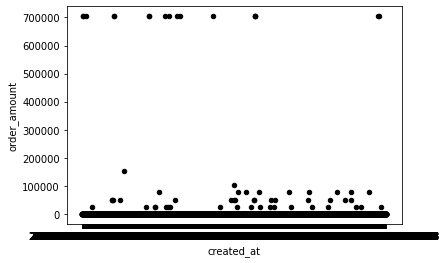

In [11]:
fig = data.plot.scatter(x='created_at',y='order_amount', c='black')

As we can see, the mean of the order_amount is 3145.128$, but the median is only 284. So we can remark that the distribution of order_amount is positive skew, even 75\%(3rd quantile) is only 390 ! So the mean is influenced by thoses outliers (order_amount >= 700000). So mean in this situation is not really reprensentative the situation of the commercial. If we say only mean = 3145.128, we can tell that AOV is actually high for sneaker's industry. But here each store sell only one model of sneaker, so it can be overevaluate and overestimate, and it didn't help the owner to make a good decision.

In my opinion, we can sort and merge data for each store (group by shop_id)

In [12]:
#Retrieve data for analyse more efficiently

In [13]:
def extractInfo(data,shopID,typedata) :
    totalItem = data[[shopID]].iloc[0]
    total = data.sum()

    print("Total "+ typedata + " sold by shop",shopID,':',totalItem)
    print("which taking a percentage of ",totalItem/total )

In [14]:
#group by shop_id : total item sold by each shop

In [15]:
dataByTotalItem = data.groupby(['shop_id'])['total_items'].sum()

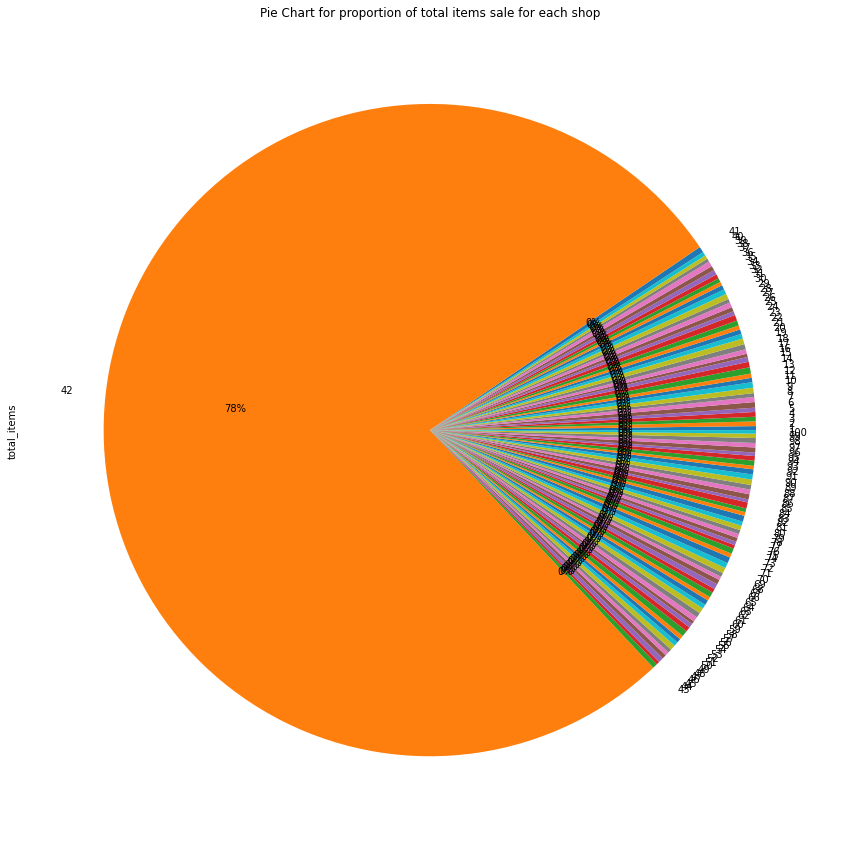

In [16]:
fig2 = dataByTotalItem.plot.pie(figsize=(15,15),autopct='%1.0f%%',
                                title = 'Pie Chart for proportion of total items sale for each shop')

In [17]:
extractInfo(dataByTotalItem,42,"item")

Total item sold by shop 42 : 34063
which taking a percentage of  0.7752867807720321


In [18]:
extractInfo(dataByTotalItem,78,'item')

Total item sold by shop 78 : 88
which taking a percentage of  0.002002913328477786


In [19]:
dataByOrderAmount = data.groupby(['shop_id'])['order_amount'].sum()

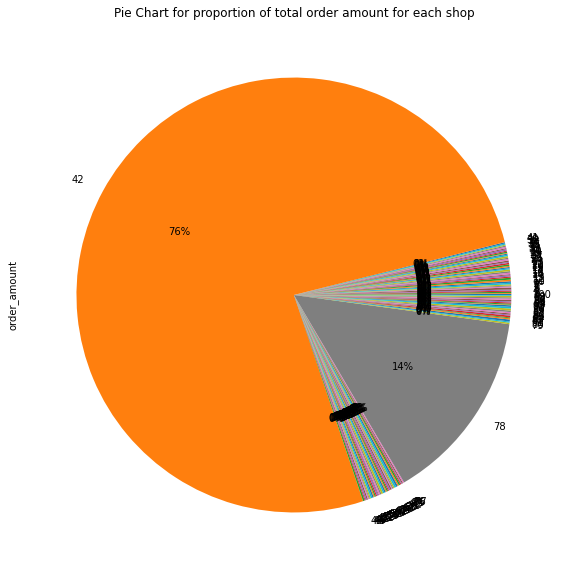

In [20]:
fig3 = dataByOrderAmount.plot.pie(figsize=(10,10),autopct='%1.0f%%',
                                title = 'Pie Chart for proportion of total order amount for each shop')

In [21]:
extractInfo(dataByOrderAmount,42,'order_amount')

Total order_amount sold by shop 42 : 11990176
which taking a percentage of  0.7624602877847897


In [22]:
extractInfo(dataByOrderAmount,78,'order_amount')

Total order_amount sold by shop 78 : 2263800
which taking a percentage of  0.1439559852571978


    From 2 thoses pie chart, we can remark that store #42 sell most of items from all store, and also taking the first place for total order_amount. But also we can see that shop #78 with only 0.2% of total item sold, but taking 2nd place which is 14% of total_amount ! So say that shop #78 is selling hype-sneakers (limited edition) containting the outliers of the dataset.
    

In [23]:
dataMeanOrderAmount = data.groupby(['shop_id'])['order_amount'].mean()

In [24]:
dataMeanOrderAmount

shop_id
1      308.818182
2      174.327273
3      305.250000
4      258.509804
5      290.311111
          ...    
96     330.000000
97     324.000000
98     245.362069
99     339.444444
100    213.675000
Name: order_amount, Length: 100, dtype: float64

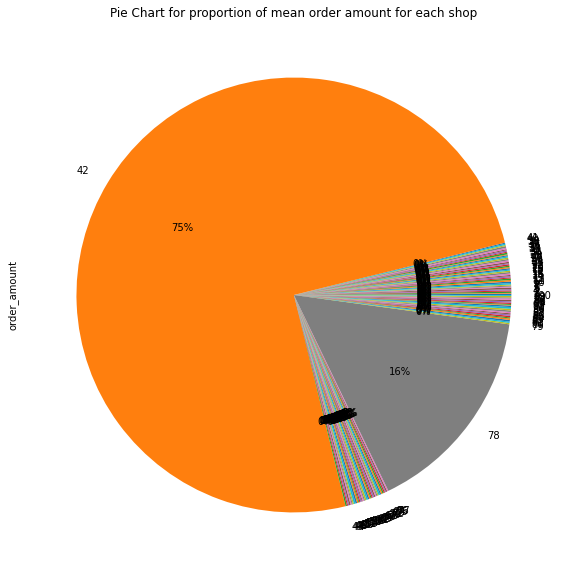

In [25]:
fig4 = dataMeanOrderAmount.plot.pie(figsize=(10,10),autopct='%1.0f%%',
                                title = 'Pie Chart for proportion of mean order amount for each shop')

In [35]:
extractInfo(dataMeanOrderAmount,42,'mean')

Total mean sold by shop 42 : 235101.49019607843
which taking a percentage of  0.7494865319907407


In [36]:
extractInfo(dataMeanOrderAmount,78,'mean')

Total mean sold by shop 78 : 49213.04347826087
which taking a percentage of  0.15688762012724378


Also we can evaluate the mean for each shop, most of them is around 200-300$ for mean, only shop 42 and 78 are taking a big part of the pie. And the owner now can analyse why there is a big different between theres 2 shop and 98 other shops (location, product, marketing, etc.)

### b) What metric would you report for this dataset?

For the skewer distribution, i would like to use 5 number who represent in a better way the dataset with order_amount instead of mean :
    Min - Q1 - Median - Q3 - Max and IQR
With theres 5 numbers, we can have an idea how the order_amount is distribued !

### c) What is its value?

In [26]:
data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

- min = 90
- Q1 = 163 
- median = 284
- Q3 = 390
- max = 704000
- IQR = Q3 - Q1 = 390 - 163 = 227

## Question 2

In [27]:
from IPython.display import Image

### a) How many orders were shipped by Speedy Express in total?

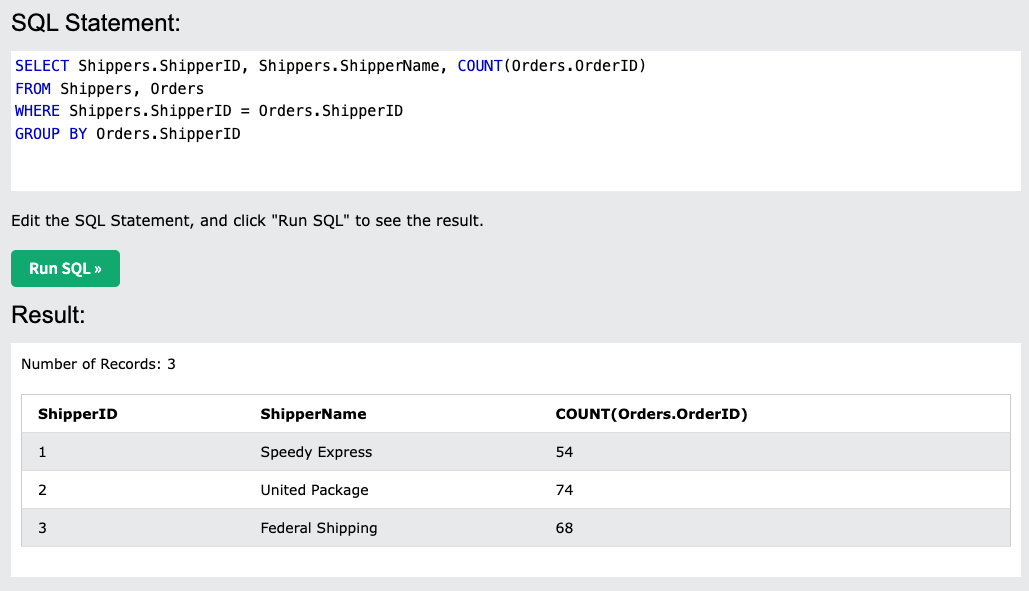

In [28]:
Image(filename='Image/Q2-a.png')

So 54 orders were shipped by Speedy Express

### b) What is the last name of the employee with the most orders?

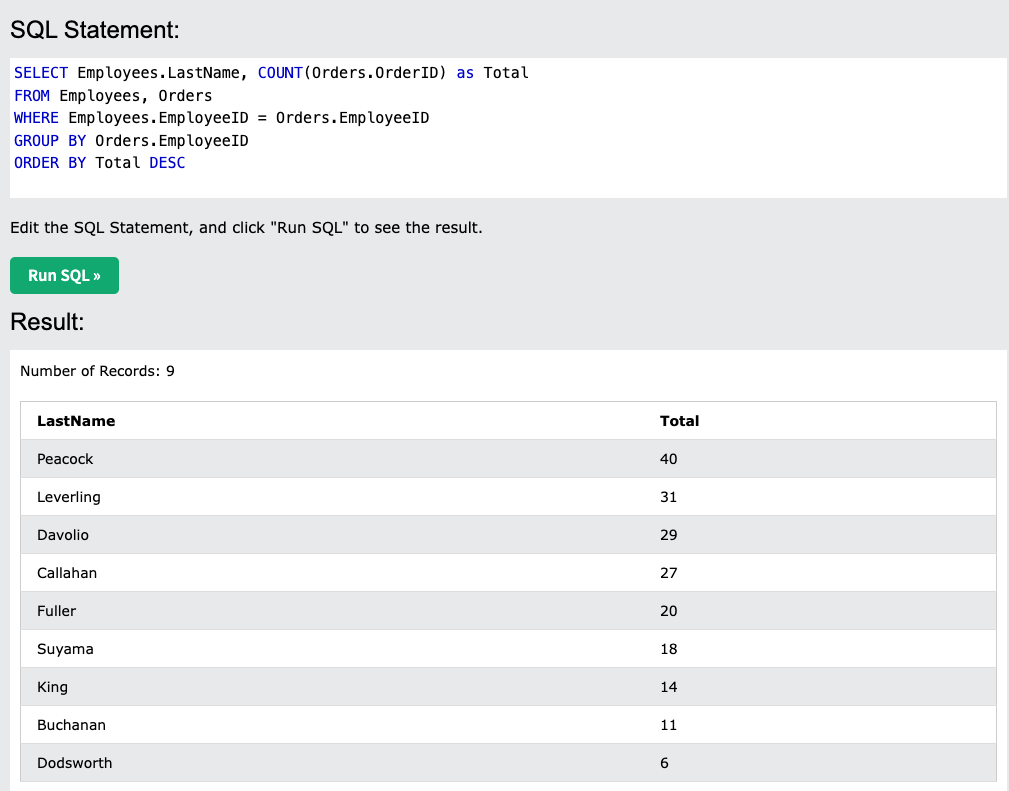

In [29]:
Image(filename='Image/Q2-b.png')

The last name of the employee withe the most orders is Peacock.

### c) What product was ordered the most by customers in Germany?

#### Scenario 1 : If we count by total quantity ordered, here is SQL code :

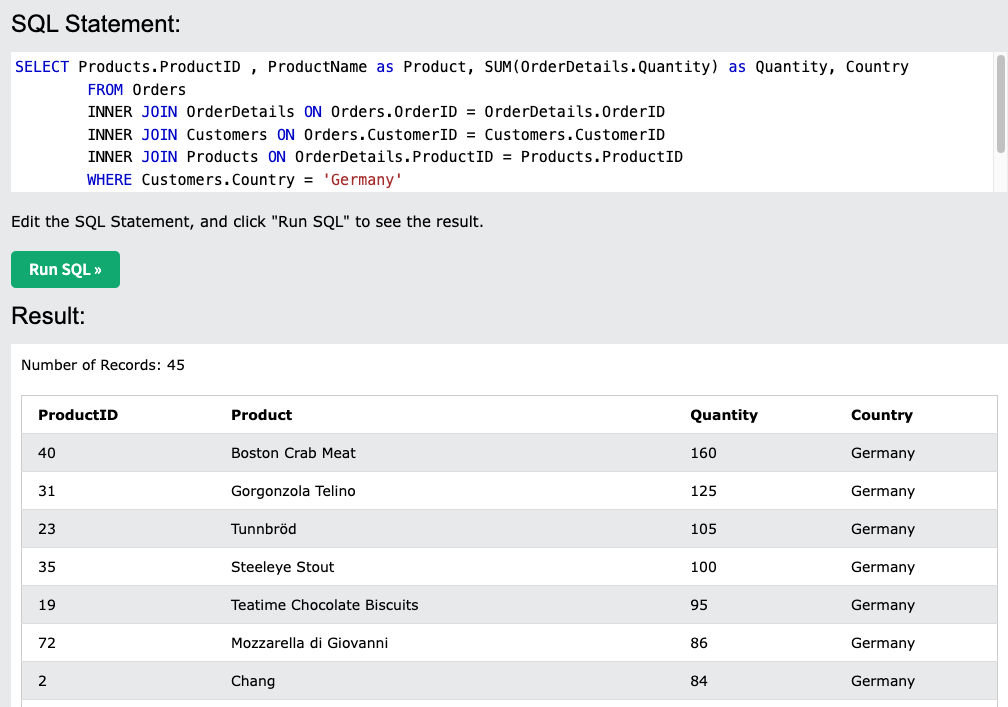

In [30]:
Image(filename='Image/Q2-c1.png')

#### So the product most ordered by customers in Germany is Boston Crab Meat ( with total quantity of 160)

#### Scenario 2 : If we count by quantity per order, here is SQL code :

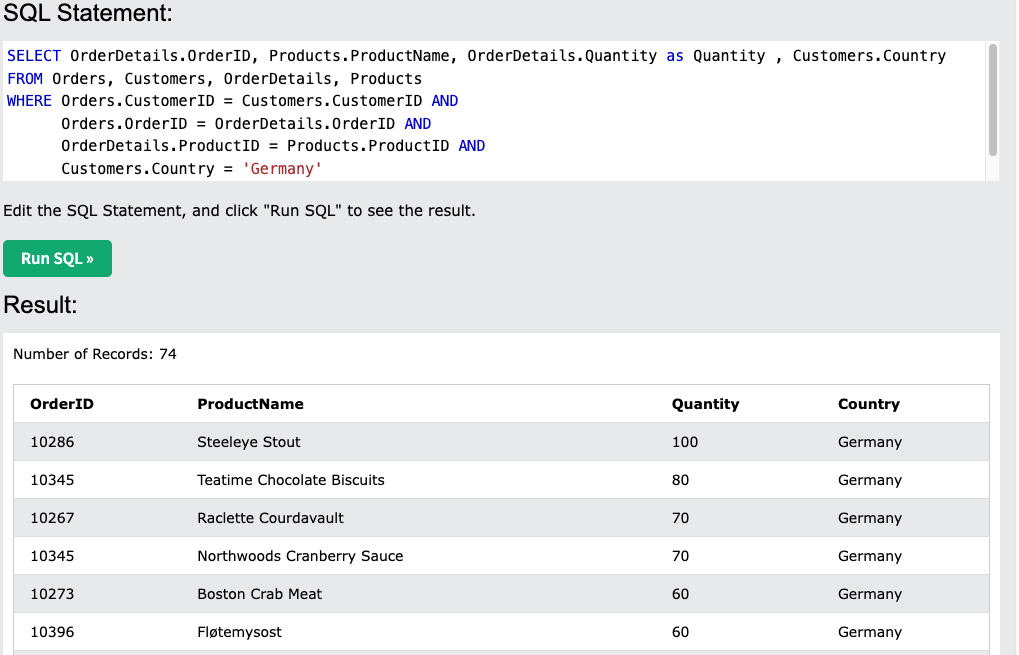

In [31]:
Image(filename='Image/Q2-c2.png')

#### So Steeleye Stout was ordered the most in order#10286 with quantity of 100 !

#### Scenario 3 : If we count by frequence of the product, here is SQL code :

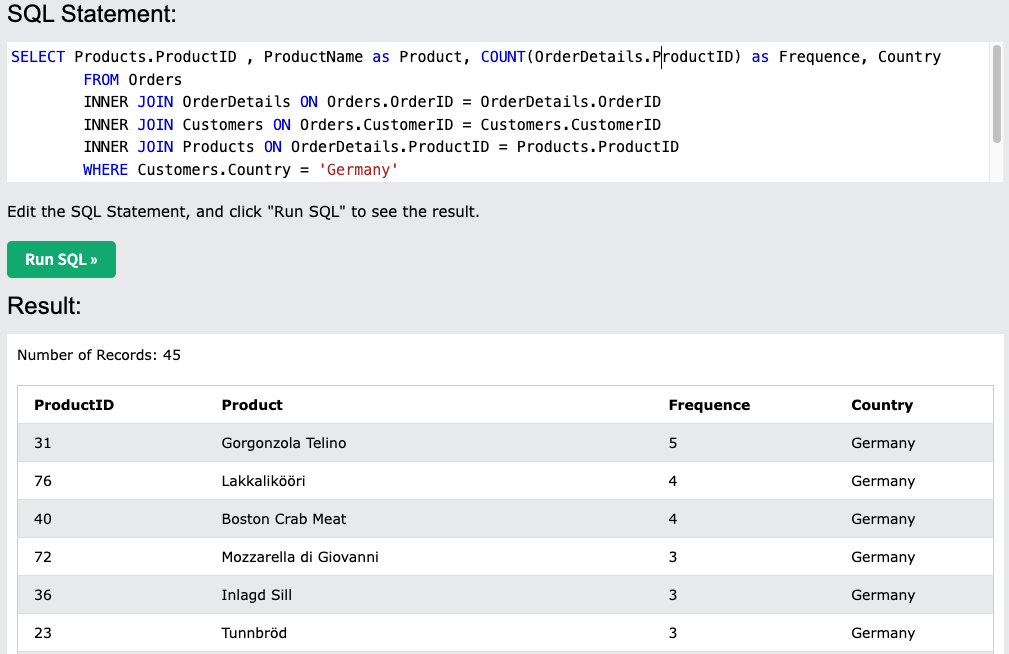

In [32]:
Image(filename='Image/Q2-c3.png')

#### So the product Gorgonzola Telino has the most frequence ( 5 times) in orders of the customers in Germany.